# Random Forest Model

In [23]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from scikitplot.plotters import plot_feature_importances
import graphviz
from sklearn.tree import export_graphviz

In [26]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [27]:
def evaluate_model (model, y_pred, y_probs, visualize = True, tuned = False):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', accuracy)

    print(classification_report(y_test, y_pred))

    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    skplt.metrics.plot_roc(y_test, y_probs)
    skplt.metrics.plot_precision_recall_curve(y_test, y_probs)

    if not tuned:
        plot_feature_importances(model, feature_names = X_test.columns)

## 1. Load Data from GitHub

In [28]:
X_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_train.csv?raw=true')
X_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_test.csv?raw=true')
y_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_train.csv?raw=true')
y_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_test.csv?raw=true')

In [29]:
X_test.shape, X_train.shape

((61, 17), (242, 17))

In [30]:
y_test.shape, y_train.shape

((61, 1), (242, 1))

## 2. Base RF Model

In [31]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)

Accuracy Score:  0.819672131147541
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=FutureWarning)


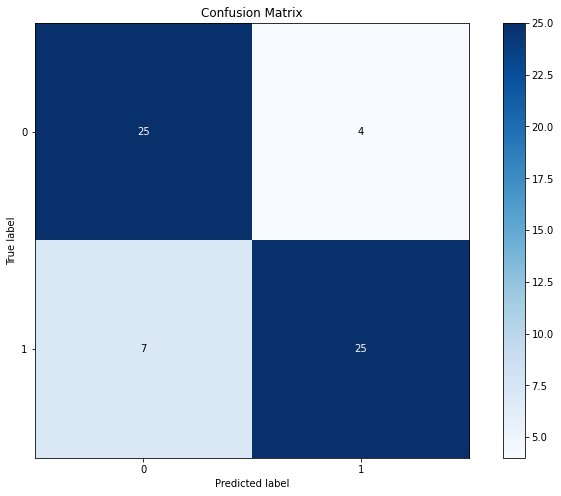

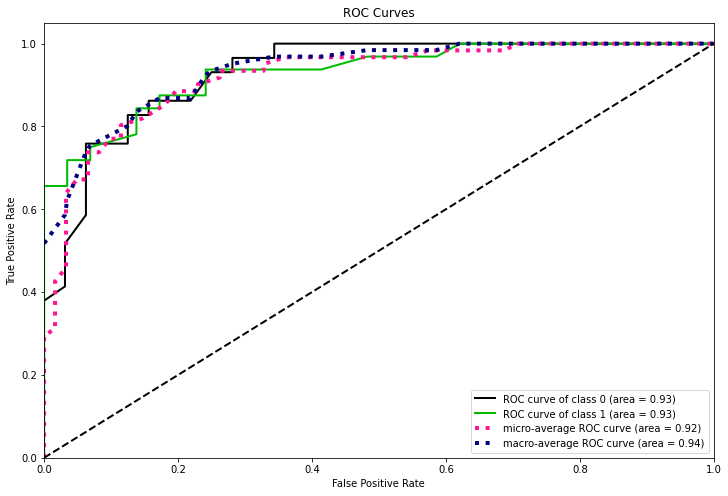

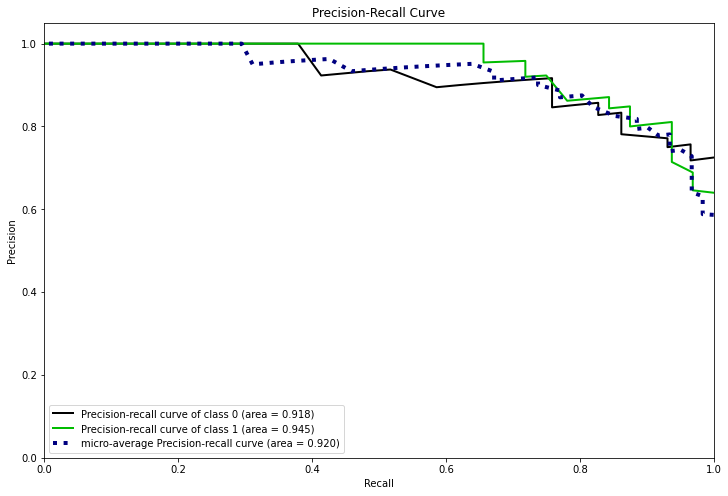

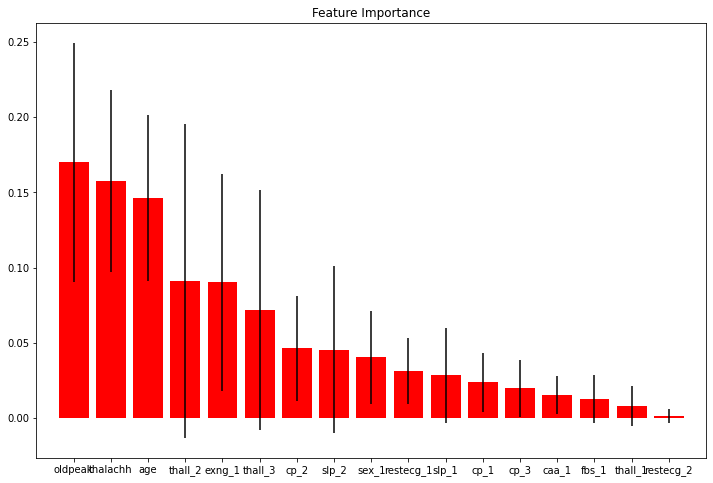

In [33]:
evaluate_model(rf, y_pred, y_probs)

## 3. Hyperparameter Tuning With ```GridSearchCV```



In [34]:
rf = RandomForestClassifier(random_state = 42)

In [35]:
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [36]:
clf = GridSearchCV(rf, param_grid, n_jobs = 2, verbose = 10)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7851190476190475
{'max_depth': 10, 'n_estimators': 600}


In [37]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

Accuracy Score:  0.8360655737704918
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


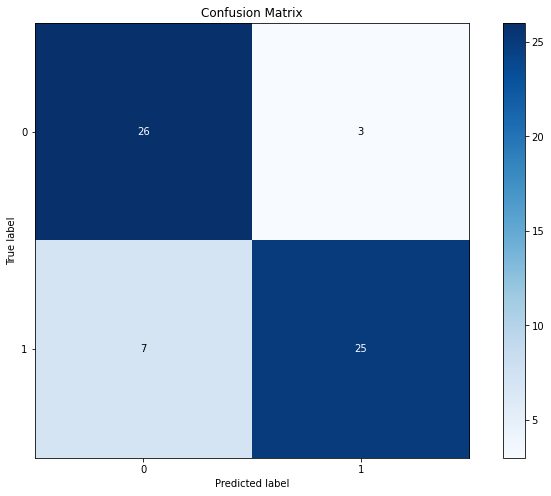

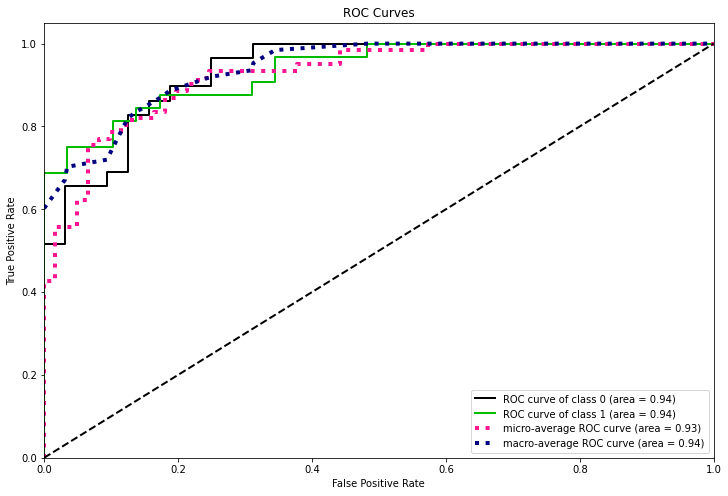

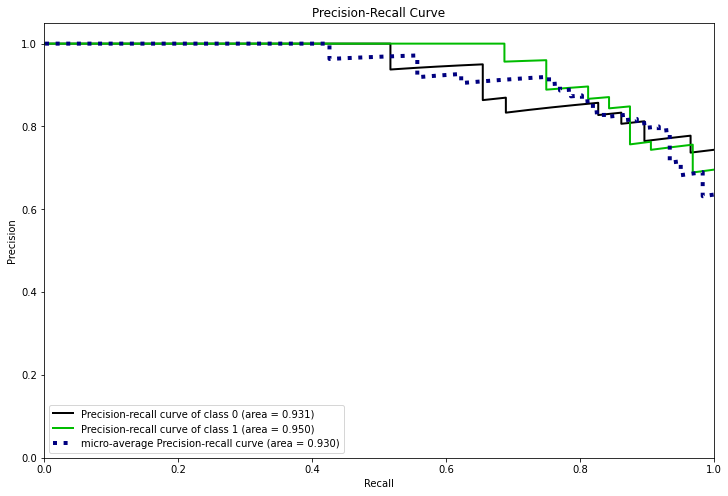

In [38]:
evaluate_model(clf, y_pred, y_probs, visualize = False, tuned = True)